In [2]:
import numpy as np        
import decoder

np.random.seed(0)
size = 6
scores = np.random.randint(0, 100, (size, size)).astype(float)
scores[:, 0] = -np.Inf
scores[np.diag_indices_from(scores)] = -np.Inf


cle = decoder.CLE_n()
output= cle.decode(scores)
output.sort(key=lambda x: x[1])
output

[[3, 1], [0, 2], [5, 3], [5, 4], [2, 5]]

In [3]:
cle = decoder.CLE(verbose=True)
output_true = cle.decode(scores)
output_true.sort(key=lambda x: x[1])

[decode] Max index pairs: {1: 3, 2: 5, 3: 5, 4: 5, 5: 1}
[decode] Cycle found: {1: 3, 3: 5, 5: 1}
[resolve] New updated graph:
{0: {1: 187.0, 2: 64.0, 3: 196.0, 4: 67.0, 5: 149.0},
 1: {2: 36.0, 3: 87.0, 4: 70.0, 5: 88.0},
 2: {1: 152.0, 3: 194.0, 4: 39.0, 5: 227.0},
 3: {1: 88.0, 2: 81.0, 4: 25.0, 5: 77.0},
 4: {1: 149.0, 2: 20.0, 3: 209.0, 5: 219.0},
 5: {1: 64.0, 2: 82.0, 3: 99.0, 4: 88.0}}
[resolve] Starting to create new graph.
[resolve] New created graph:
{0: {1: 196.0, 2: 64.0, 4: 67.0},
 1: {2: 82.0, 4: 88.0},
 2: {1: 227.0, 4: 39.0},
 4: {1: 219.0, 2: 20.0}}
[decode] Max index pairs: {2: 1, 4: 1, 1: 2}
[decode] Cycle found: {2: 1, 1: 2}
[resolve] New updated graph:
{0: {1: 278.0, 2: 291.0, 4: 67.0},
 1: {2: 82.0, 4: 88.0},
 2: {1: 227.0, 4: 39.0},
 4: {1: 301.0, 2: 247.0}}
[resolve] Starting to create new graph.
[resolve] New created graph:
{0: {1: 291.0, 4: 67.0}, 1: {4: 88.0}, 4: {1: 301.0}}
[decode] Max index pairs: {4: 1, 1: 4}
[decode] Cycle found: {4: 1, 1: 4}
[resolve] 

In [4]:
output_true

[[5, 1], [0, 2], [1, 3], [5, 4], [2, 5]]

In [5]:
output

[[3, 1], [0, 2], [5, 3], [5, 4], [2, 5]]

In [6]:
for i in range(100):
    np.random.seed(i)
    size = 4
    scores = np.random.randint(0, 100, (size, size)).astype(float)
    scores[:, 0] = -np.Inf
    scores[np.diag_indices_from(scores)] = -np.Inf


    cle = decoder.CLE_n()
    output= cle.decode(scores)
    output.sort(key=lambda x: x[1])
    output

    cle = decoder.CLE(verbose=False)
    output_true = cle.decode(scores)
    output_true.sort(key=lambda x: x[1])

    if output != output_true:
        print(i)
        print(output)
        print(output_true)
        print()
        cle = decoder.CLE(verbose=True)
        output_true = cle.decode(scores)
        output_true.sort(key=lambda x: x[1])

1
[[3, 1], [0, 2], [2, 3]]
[[2, 1], [0, 2], [1, 3]]

[decode] Max index pairs: {1: 3, 2: 1, 3: 2}
[decode] Cycle found: {1: 3, 3: 2, 2: 1}
[resolve] New updated graph:
{0: {1: 102.0, 2: 108.0, 3: 53.0},
 1: {2: 79.0, 3: 64.0},
 2: {1: 1.0, 3: 71.0},
 3: {1: 25.0, 2: 50.0}}
[resolve] Starting to create new graph.
[resolve] New created graph:
{0: {1: 108.0}, 1: {}}
[decode] Max index pairs: {1: 0}
[decode] Cycle found: None
[decode] No cycle found. Returning max index pairs.
[decode] New graph
[[0, 1]]
[decode] New (resolved) graph
[[0, 2]]
[resolve cycle] Resolved cycle [[1, 3], [2, 1]]
[resolve cycle] Resolved graph
[[0, 2], [1, 3], [2, 1]]
7
[[0, 1], [1, 2], [2, 3]]
[[0, 1], [3, 2], [1, 3]]

[decode] Max index pairs: {1: 3, 2: 1, 3: 2}
[decode] Cycle found: {1: 3, 3: 2, 2: 1}
[resolve] New updated graph:
{0: {1: 66.0, 2: 21.0, 3: 66.0},
 1: {2: 92.0, 3: 57.0},
 2: {1: 23.0, 3: 89.0},
 3: {1: 90.0, 2: 8.0}}
[resolve] Starting to create new graph.
[resolve] New created graph:
{0: {1: 66

In [7]:
def matrix_to_graph_test(scores):
    '''Transform adjacency matrix into dictionary, where V= {start node: {end node: cost}}'''
    graph = {}
    for i_start, row in enumerate(scores):
        arcs = {str(i_end):{'score': score} for i_end, score in enumerate(row) if score != -np.Inf}

        # Don't include nodes that have no connections
        if len(arcs) > 0:
            graph[str(i_start)] = arcs 
    
    return graph

In [8]:
import networkx as nx

graph = matrix_to_graph_test(scores)

nx_graph = nx.DiGraph(graph)

cle2 = nx.algorithms.tree.branchings.Edmonds(nx_graph)
cle_graph2 = cle2.find_optimum(attr='score', kind='max', style="aborescence", preserve_attrs=True)
cle_graph2_dict = nx.to_dict_of_dicts(cle_graph2)

arcs = []
for head in cle_graph2_dict.keys():
    if len(cle_graph2_dict[head]):
        for dep in cle_graph2_dict[head]:
            arcs.append([int(head), int(dep)])

arcs.sort(key=lambda x: x[1])  

In [9]:
labels = {e: nx_graph.edges[e]['score'] for e in nx_graph.edges}
labels


{('0', '1'): 35.0,
 ('0', '2'): 57.0,
 ('0', '3'): 40.0,
 ('1', '2'): 68.0,
 ('1', '3'): 69.0,
 ('2', '1'): 1.0,
 ('2', '3'): 35.0,
 ('3', '1'): 65.0,
 ('3', '2'): 48.0}

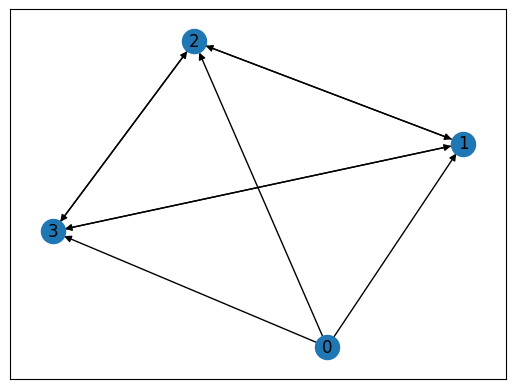

In [10]:
nx.draw_networkx(nx_graph, with_labels=True)

In [11]:
pos=nx.get_node_attributes(cle_graph2,'pos')
labels = {e: cle_graph2.edges[e]['score'] for e in cle_graph2.edges}
labels

{('0', '3'): 40.0, ('1', '2'): 68.0, ('3', '1'): 65.0}

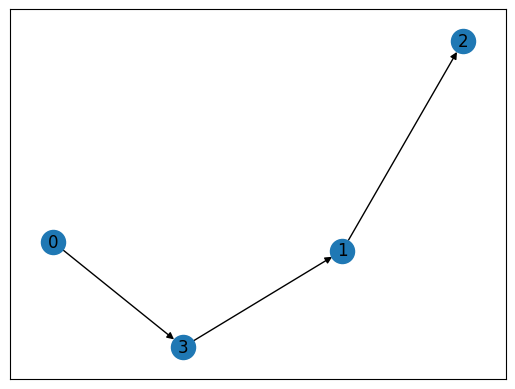

In [12]:
nx.draw_networkx(cle_graph2)

In [13]:
graph

{'0': {'1': {'score': 35.0}, '2': {'score': 57.0}, '3': {'score': 40.0}},
 '1': {'2': {'score': 68.0}, '3': {'score': 69.0}},
 '2': {'1': {'score': 1.0}, '3': {'score': 35.0}},
 '3': {'1': {'score': 65.0}, '2': {'score': 48.0}}}

In [14]:
n_graph = {}
for key, values in graph.items():
    if key not in n_graph:
        n_graph[int(key)] = {}

    for k, v in values.items():
        n_graph[int(key)][int(k)] = v['score']

n_graph

{0: {1: 35.0, 2: 57.0, 3: 40.0},
 1: {2: 68.0, 3: 69.0},
 2: {1: 1.0, 3: 35.0},
 3: {1: 65.0, 2: 48.0}}

In [32]:
def reverse_graph(graph):
    # Reverse graph
    reverse_graph = {}
    for head in graph:
        for (dep, score) in graph[head].items():
            if dep in reverse_graph:
                reverse_graph[dep][head] = score
            else:
                reverse_graph[dep] = {head: score}
    return reverse_graph

def find_cycle(index_pairs):
    seen = {'0'}
    for node in index_pairs:
        path = []

        while node not in seen:
            seen.add(node)
            path.append(node)
            # TODO: currently have score
            node = list(index_pairs[node].keys())[0]

        if node in path: # A way to break out if we get into an infinite loop
            return path[path.index(node):]

    return None

def max_edges(reverse_graph):
    # Find max connections
    best_edge = {dep:{0: {'score': -np.Inf}} for dep in reverse_graph}
    for dep, edges in reverse_graph.items():
        for head, score in edges.items(): 
            max_score = list(best_edge[dep].values())[0]
            if max_score['score'] < score['score']:
                best_edge[dep] = {head: score}

    return best_edge

In [36]:

reversed_graph = reverse_graph(graph)
max_edge = max_edges(reversed_graph)

cycle = find_cycle(max_edge)
if cycle != None:
    graph



{'1': {'3': {'score': 65.0}}, '2': {'1': {'score': 68.0}}, '3': {'1': {'score': 69.0}}}
['1', '3']
boom


{'1': {'3': {'score': 65.0}},
 '2': {'1': {'score': 68.0}},
 '3': {'1': {'score': 69.0}}}

In [128]:
def find_cycle(index_pairs):
    seen = {'0'}
    for node in index_pairs:
        path = []

        while node not in seen:
            seen.add(node)
            path.append(node)
            # TODO: currently have score
            node = list(index_pairs[node].keys())[0]

        if node in path: # A way to break out if we get into an infinite loop
            return path[path.index(node):]

    return None

In [131]:
cycle = find_cycle(best_edge)
if len(cycle) == 0:
    pass
    # return cycle

In [ ]:
def CLE(graph):